In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import gkey


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# list for holding lat_lngs and cities

from collections import defaultdict
lat_lng = defaultdict()

# create a set of random lat and lng combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for x in lat_lngs:
    lat, long = x #tuple unpacking
    city = citipy.nearest_city(lat, long).city_name
    lat_lng[city] = (lat, long)
    print(f'Retrieving city: {city} at :(lat, long)')

Retrieving city: kurumkan at :(lat, long)
Retrieving city: vaini at :(lat, long)
Retrieving city: isangel at :(lat, long)
Retrieving city: port hardy at :(lat, long)
Retrieving city: kapaa at :(lat, long)
Retrieving city: punta arenas at :(lat, long)
Retrieving city: bar harbor at :(lat, long)
Retrieving city: cape town at :(lat, long)
Retrieving city: krasnoarmeyskiy at :(lat, long)
Retrieving city: ahipara at :(lat, long)
Retrieving city: vaini at :(lat, long)
Retrieving city: muzaffarabad at :(lat, long)
Retrieving city: east london at :(lat, long)
Retrieving city: kaitangata at :(lat, long)
Retrieving city: atuona at :(lat, long)
Retrieving city: saint-philippe at :(lat, long)
Retrieving city: sitka at :(lat, long)
Retrieving city: saskylakh at :(lat, long)
Retrieving city: angicos at :(lat, long)
Retrieving city: bengkulu at :(lat, long)
Retrieving city: sorland at :(lat, long)
Retrieving city: sola at :(lat, long)
Retrieving city: norman wells at :(lat, long)
Retrieving city: cas

Retrieving city: challapata at :(lat, long)
Retrieving city: rikitea at :(lat, long)
Retrieving city: nansio at :(lat, long)
Retrieving city: kavieng at :(lat, long)
Retrieving city: gurupa at :(lat, long)
Retrieving city: rikitea at :(lat, long)
Retrieving city: bubaque at :(lat, long)
Retrieving city: lorengau at :(lat, long)
Retrieving city: san cristobal at :(lat, long)
Retrieving city: uray at :(lat, long)
Retrieving city: roald at :(lat, long)
Retrieving city: afmadu at :(lat, long)
Retrieving city: melville at :(lat, long)
Retrieving city: ola at :(lat, long)
Retrieving city: nikolskoye at :(lat, long)
Retrieving city: mapastepec at :(lat, long)
Retrieving city: aviles at :(lat, long)
Retrieving city: zolotonosha at :(lat, long)
Retrieving city: albany at :(lat, long)
Retrieving city: eureka at :(lat, long)
Retrieving city: kuche at :(lat, long)
Retrieving city: sao filipe at :(lat, long)
Retrieving city: jamestown at :(lat, long)
Retrieving city: longyearbyen at :(lat, long)
Re

Retrieving city: barentsburg at :(lat, long)
Retrieving city: hoi an at :(lat, long)
Retrieving city: rexburg at :(lat, long)
Retrieving city: qaanaaq at :(lat, long)
Retrieving city: mishkino at :(lat, long)
Retrieving city: khash at :(lat, long)
Retrieving city: lithakia at :(lat, long)
Retrieving city: mahebourg at :(lat, long)
Retrieving city: paradwip at :(lat, long)
Retrieving city: miri at :(lat, long)
Retrieving city: nikolskoye at :(lat, long)
Retrieving city: maragogi at :(lat, long)
Retrieving city: atuona at :(lat, long)
Retrieving city: vaini at :(lat, long)
Retrieving city: ponta do sol at :(lat, long)
Retrieving city: surt at :(lat, long)
Retrieving city: ushuaia at :(lat, long)
Retrieving city: albany at :(lat, long)
Retrieving city: diego de almagro at :(lat, long)
Retrieving city: pierre at :(lat, long)
Retrieving city: kapaa at :(lat, long)
Retrieving city: rikitea at :(lat, long)
Retrieving city: klaksvik at :(lat, long)
Retrieving city: nizhniy tsasuchey at :(lat, 

Retrieving city: palaiokhora at :(lat, long)
Retrieving city: yellowknife at :(lat, long)
Retrieving city: taolanaro at :(lat, long)
Retrieving city: amderma at :(lat, long)
Retrieving city: ulaangom at :(lat, long)
Retrieving city: bethel at :(lat, long)
Retrieving city: sao filipe at :(lat, long)
Retrieving city: punta arenas at :(lat, long)
Retrieving city: narsaq at :(lat, long)
Retrieving city: ostrovnoy at :(lat, long)
Retrieving city: caravelas at :(lat, long)
Retrieving city: butaritari at :(lat, long)
Retrieving city: palmares do sul at :(lat, long)
Retrieving city: kawalu at :(lat, long)
Retrieving city: owosso at :(lat, long)
Retrieving city: fortuna at :(lat, long)
Retrieving city: rikitea at :(lat, long)
Retrieving city: handwara at :(lat, long)
Retrieving city: plouzane at :(lat, long)
Retrieving city: zelenoborskiy at :(lat, long)
Retrieving city: yellowknife at :(lat, long)
Retrieving city: lorengau at :(lat, long)
Retrieving city: ushuaia at :(lat, long)
Retrieving cit

In [3]:
df = pd.DataFrame(list(lat_lng.items()))
df.columns = ["city", "lat_long"]
df['lat'] = df.lat_long.map(lambda x: str(x[0]))
df['lon'] = df.lat_long.map(lambda x: str(x[1]))
df.shape

(630, 4)

In [4]:
df.head()

,city,lat_long,lat,lon
0,mys shmidta,"(86.35963611345696, -179.30446668209328)",86.35963611345696,-179.30446668209328
1,port keats,"(-14.09006513168886, 127.38635613845486)",-14.09006513168886,127.38635613845486
2,dicabisagan,"(18.594210829707407, 126.68477156377577)",18.594210829707407,126.68477156377577
3,illoqqortoormiut,"(78.54333873182773, -29.949604466665363)",78.54333873182773,-29.949604466665363
4,shenjiamen,"(30.971105359699223, 124.63650123168748)",30.971105359699223,124.63650123168748


## Perform API Calls

In [5]:
def get_current_weather(df_object):
    # OpenWeatherMap API Key
    # Starting URL for Weather Map API Call
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'APPID' : gkey,
        'lat' : df_object.lat,
        'lon' : df_object.lon,
        'units' : 'Imperial'
    }
    data = requests.get(base_url, params=params)
    return data.json()
    time.sleep(.50)

In [6]:
# Test the function on a sample of the dataframe - recall the free edition 
# Limits you to 60 calls per minute
sample = df.sample(n=100)
sample["weather_json"] = sample.apply(get_current_weather, axis=1)
sample["temp"] = sample.weather_json.map(lambda x: x.get('main').get('temp'))
sample.head()

,city,lat_long,lat,lon,weather_json,temp
458,jinxiang,"(26.477998938844365, 120.58029441863658)",26.477998938844365,120.58029441863658,"{'coord': {'lon': 120.58, 'lat': 26.48}, 'weat...",76.06
456,presidente medici,"(-11.424771629503567, -62.13860905171518)",-11.424771629503567,-62.13860905171518,"{'coord': {'lon': -62.14, 'lat': -11.42}, 'wea...",76.60
294,hurghada,"(26.974811706060564, 33.55503808756319)",26.974811706060564,33.55503808756319,"{'coord': {'lon': 33.56, 'lat': 26.97}, 'weath...",86.00
601,merauke,"(-7.161117016547436, 138.24210262482558)",-7.161117016547436,138.24210262482558,"{'coord': {'lon': 138.24, 'lat': -7.16}, 'weat...",79.03
216,victoria,"(-10.9006553043654, 63.490501545219956)",-10.9006553043654,63.490501545219956,"{'coord': {'lon': 63.49, 'lat': -10.9}, 'weath...",80.38


In [7]:
df["weather_json"] = df.apply(get_current_weather, axis=1)

In [8]:
df["temp"] = df.weather_json.map(lambda x: x.get('main').get('temp'))
df["humidity"] = df.weather_json.map(lambda x: x.get('main').get('humidity'))
df["wind_speed"] = df.weather_json.map(lambda x: x.get('wind').get('speed'))
df["cloudiness"] = df.weather_json.map(lambda x: x.get('clouds').get('all'))
df.head()

,city,lat_long,lat,lon,weather_json,temp,humidity,wind_speed,cloudiness
0,mys shmidta,"(86.35963611345696, -179.30446668209328)",86.35963611345696,-179.30446668209328,"{'coord': {'lon': -179.3, 'lat': 86.36}, 'weat...",31.60,100,21.09,76
1,port keats,"(-14.09006513168886, 127.38635613845486)",-14.09006513168886,127.38635613845486,"{'coord': {'lon': 127.39, 'lat': -14.09}, 'wea...",74.08,100,23.40,0
2,dicabisagan,"(18.594210829707407, 126.68477156377577)",18.594210829707407,126.68477156377577,"{'coord': {'lon': 126.68, 'lat': 18.59}, 'weat...",84.16,100,17.63,64
3,illoqqortoormiut,"(78.54333873182773, -29.949604466665363)",78.54333873182773,-29.949604466665363,"{'coord': {'lon': -29.95, 'lat': 78.54}, 'weat...",19.27,73,8.79,0
4,shenjiamen,"(30.971105359699223, 124.63650123168748)",30.971105359699223,124.63650123168748,"{'coord': {'lon': 124.64, 'lat': 30.97}, 'weat...",71.11,100,12.03,64


In [26]:
df['lat'] = pd.to_numeric(df['lat'])
df['lon'] = pd.to_numeric(df['lon'])
type(df['lon'][0])

numpy.float64

In [55]:
df.to_csv('output_data_file.csv')

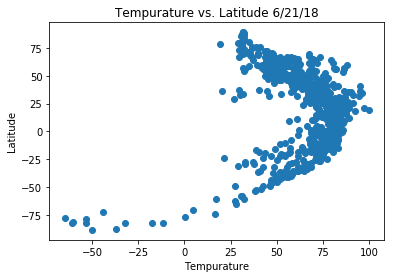

In [56]:
plt.scatter(df['temp'], df['lat'])
plt.xlabel('Tempurature')
plt.ylabel('Latitude') 
plt.title('Tempurature vs. Latitude 6/21/18')
plt.savefig('temp_vs_lat.png')

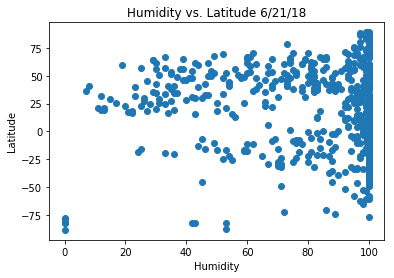

In [57]:
plt.scatter(df['humidity'], df['lat'])
plt.xlabel('Humidity')
plt.ylabel('Latitude') 
plt.title('Humidity vs. Latitude 6/21/18')
plt.savefig('hum_vs_lat.png')

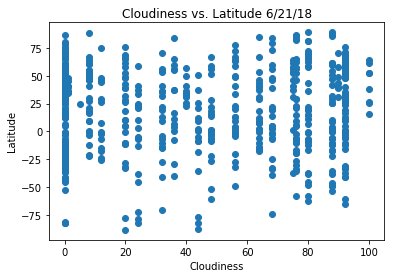

In [58]:
plt.scatter(df['cloudiness'], df['lat'])
plt.xlabel('Cloudiness')
plt.ylabel('Latitude') 
plt.title('Cloudiness vs. Latitude 6/21/18')
plt.savefig('cloud_vs_lat.png')

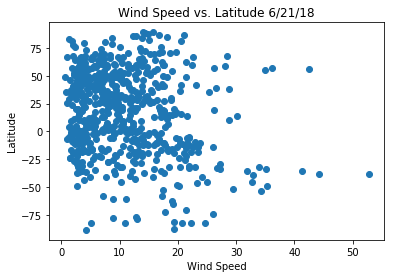

In [59]:
plt.scatter(df['wind_speed'], df['lat'])
plt.xlabel('Wind Speed')
plt.ylabel('Latitude') 
plt.title('Wind Speed vs. Latitude 6/21/18')
plt.savefig('wind_vs_lat.png')

In [42]:
wind_speed_mask = (df['wind_speed'] > 30)
df[wind_speed_mask]

,city,lat_long,lat,lon,weather_json,temp,humidity,wind_speed,cloudiness
15,chuy,"(-38.678695418591104, -45.966245187129545)",-38.678695,-45.966245,"{'coord': {'lon': -45.97, 'lat': -38.68}, 'wea...",58.15,100,52.75,88
17,cidreira,"(-35.83777317215958, -45.548880618899005)",-35.837773,-45.548881,"{'coord': {'lon': -45.55, 'lat': -35.84}, 'wea...",61.39,100,41.29,44
41,albany,"(-53.93091959897851, 118.2571222762831)",-53.930920,118.257122,"{'coord': {'lon': 118.26, 'lat': -53.93}, 'wea...",38.44,99,34.18,88
52,maldonado,"(-35.93498245714719, -55.11995464278648)",-35.934982,-55.119955,"{'coord': {'lon': -55.12, 'lat': -35.93}, 'wea...",54.46,100,31.79,0
75,saldanha,"(-39.35731208151727, 6.0675145199190865)",-39.357312,6.067515,"{'coord': {'lon': 6.07, 'lat': -39.36}, 'weath...",55.99,90,32.95,68
95,laguna,"(-32.266876619102796, -40.42343987839445)",-32.266877,-40.423440,"{'coord': {'lon': -40.42, 'lat': -32.27}, 'wea...",68.50,94,33.96,20
182,varhaug,"(57.24536602574946, 2.648857306919922)",57.245366,2.648857,"{'coord': {'lon': 2.65, 'lat': 57.25}, 'weathe...",52.57,100,36.19,76
187,avera,"(-33.864163030005905, -156.38958254929366)",-33.864163,-156.389583,"{'coord': {'lon': -156.39, 'lat': -33.86}, 'we...",65.35,95,35.19,92
283,rio grande,"(-38.68277371320195, -44.34326012167398)",-38.682774,-44.343260,"{'coord': {'lon': -44.34, 'lat': -38.68}, 'wea...",58.15,100,44.25,24
343,den helder,"(55.607367215447795, 2.9758141555412863)",55.607367,2.975814,"{'coord': {'lon': 2.98, 'lat': 55.61}, 'weathe...",51.80,81,42.50,92
